In [ ]:
import matplotlib.pyplot as plt
import numpy as np
!pip install tensorflow==2.7.0
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Activation,Dense,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K 
from sklearn.model_selection import train_test_split
from tensorflow.keras import callbacks
from sklearn.metrics import confusion_matrix

     |████████████████████████████████| 489.6 MB 23 kB/s 
     |████████████████████████████████| 463 kB 48.3 MB/s 
     |████████████████████████████████| 1.3 MB 36.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
      Successfully uninstalled tensorflow-2.8.0


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Load intel images dataset
! kaggle datasets download puneet6060/intel-image-classification
! unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [ ]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
print(class_names_label)
num_classes = len(class_names)

IMAGE_SIZE = (96, 96)

{'mountain': 0, 'street': 1, 'glacier': 2, 'buildings': 3, 'sea': 4, 'forest': 5}


In [ ]:

import os
import cv2
from tqdm import tqdm
def load_data():
    """ 
          Load data function adapted from https://www.kaggle.com/code/vincee/intel-image-classification-cnn-keras
    """
    
    datasets = ['./seg_train/seg_train', './seg_test/seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [ ]:
from sklearn.utils import shuffle
(train_images, train_labels), (test_images, test_labels) = load_data()

# normalize and shuffle
train_images = train_images / 255.0 
test_images = test_images / 255.0
train_images, train_labels = shuffle(train_images, train_labels)

Loading ./seg_train/seg_train


100%|██████████| 2512/2512 [00:01<00:00, 1530.14it/s]


Loading ./seg_test/seg_test


100%|██████████| 525/525 [00:00<00:00, 1602.99it/s]


In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(14034, 50, 50, 3)
(14034,)
(3000, 50, 50, 3)
(3000,)


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import InceptionV3
from keras import Input
from keras.models import Model
# resnet
rs = ResNet50(include_top=False, weights='imagenet')

train_rs = rs.predict(train_images)
test_rs = rs.predict(test_images)

In [ ]:
print(train_rs.shape)
print(test_rs.shape)

(14034, 2, 2, 2048)
(3000, 2, 2, 2048)


In [ ]:
net = Sequential()
net.add(Flatten(input_shape=(2,2,2048)))
net.add(Dense(128, activation='relu'))
net.add(Dense(6, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
# compile and fit the keras model
net.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = net.fit(train_rs, train_labels, batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
176/176 [==============================] - 4s 20ms/step - loss: 1.4975 - accuracy: 0.3942 - val_loss: 1.2976 - val_accuracy: 0.4806
Epoch 2/20
176/176 [==============================] - 4s 20ms/step - loss: 1.2258 - accuracy: 0.5162 - val_loss: 1.1798 - val_accuracy: 0.5522
Epoch 3/20
176/176 [==============================] - 3s 20ms/step - loss: 1.1479 - accuracy: 0.5498 - val_loss: 1.1214 - val_accuracy: 0.5554
Epoch 4/20
176/176 [==============================] - 3s 19ms/step - loss: 1.1044 - accuracy: 0.5626 - val_loss: 1.1156 - val_accuracy: 0.5753
Epoch 5/20
176/176 [==============================] - 4s 20ms/step - loss: 1.0792 - accuracy: 0.5783 - val_loss: 1.0875 - val_accuracy: 0.5939
Epoch 6/20
176/176 [==============================] - 4s 20ms/step - loss: 1.0684 - accuracy: 0.5825 - val_loss: 1.0660 - val_accuracy: 0.5761
Epoch 7/20
176/176 [==============================] - 4s 20ms/step - loss: 1.0404 - accuracy: 0.5932 - val_loss: 1.0260 - val_accuracy: 0.5985

In [ ]:
score = net.evaluate(test_rs, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1]) 

94/94 [==============================] - 0s 5ms/step - loss: 0.9830 - accuracy: 0.6213
Test loss: 0.9829694032669067
Test accuracy: 0.6213333606719971


In [ ]:
# save current model to drive
# do not run: will overwite 


# from google.colab import drive
# drive.mount('/content/drive')
# net.save('/content/drive/MyDrive/decent')



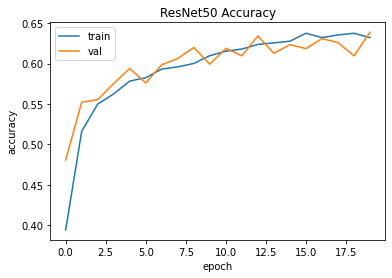

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ResNet50 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

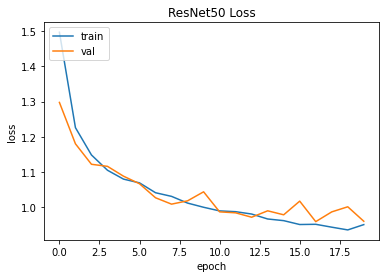

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ResNet50 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import seaborn as sn

y_classified = np.argmax(net.predict(test_rs), axis=1)
# plot confusion matrix
data = confusion_matrix(test_labels, y_classified)

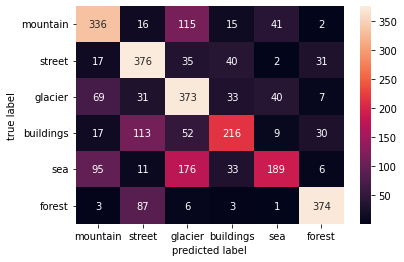

In [ ]:
hm = sn.heatmap(data=data, annot=True, fmt='.0f', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()

In [ ]:
from keras.applications.vgg16 import VGG16

vgg = VGG16(include_top=False,
                  #  input_shape=(50,50,3),
                  #  pooling='avg',
                  #  classes=6,
                   weights='imagenet')
# for layer in vgg.layers:
#   layer.trainable=False

# vgg.trainable = False

train_vgg = vgg.predict(train_images)
test_vgg = vgg.predict(test_images)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
print(train_vgg.shape)
print(test_vgg.shape)


(14034, 1, 1, 512)
(3000, 1, 1, 512)


In [ ]:
net2 = Sequential()
net2.add(Flatten(input_shape=(1, 1, 512)))
net2.add(Dense(32, activation='relu'))
net2.add(Dense(6, activation='softmax'))

In [ ]:
opt = Adam(learning_rate=0.0008)

In [ ]:
net2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history2 = net2.fit(train_vgg, train_labels, batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
176/176 [==============================] - 2s 6ms/step - loss: 1.0423 - accuracy: 0.6199 - val_loss: 0.7548 - val_accuracy: 0.7303
Epoch 2/20
176/176 [==============================] - 1s 6ms/step - loss: 0.7114 - accuracy: 0.7392 - val_loss: 0.6775 - val_accuracy: 0.7528
Epoch 3/20
176/176 [==============================] - 1s 6ms/step - loss: 0.6502 - accuracy: 0.7613 - val_loss: 0.6551 - val_accuracy: 0.7545
Epoch 4/20
176/176 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.7732 - val_loss: 0.6287 - val_accuracy: 0.7638
Epoch 5/20
176/176 [==============================] - 1s 3ms/step - loss: 0.5964 - accuracy: 0.7806 - val_loss: 0.6232 - val_accuracy: 0.7731
Epoch 6/20
176/176 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.7872 - val_loss: 0.6056 - val_accuracy: 0.7766
Epoch 7/20
176/176 [==============================] - 0s 2ms/step - loss: 0.5634 - accuracy: 0.7957 - val_loss: 0.6013 - val_accuracy: 0.7841
Epoch 

94/94 [==============================] - 0s 2ms/step - loss: 0.5974 - accuracy: 0.7783
Test loss: 0.5973681211471558
Test accuracy: 0.778333306312561


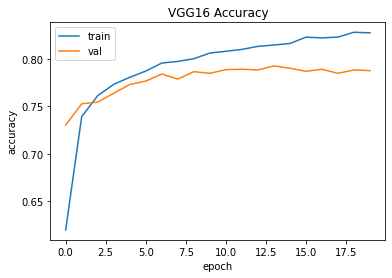

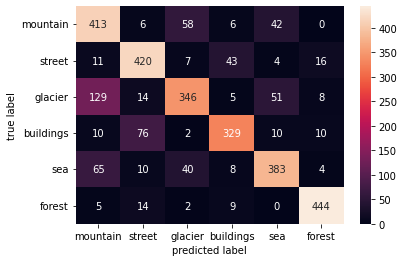

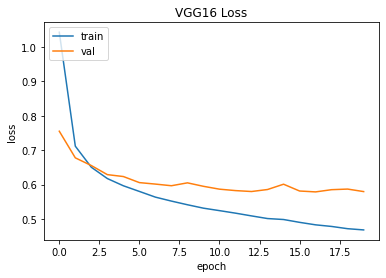

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import seaborn as sn

score2 = net2.evaluate(test_vgg, test_labels)
print("Test loss:", score2[0])
print("Test accuracy:", score2[1]) 

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('VGG16 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

y_classified2 = np.argmax(net2.predict(test_vgg), axis=1)
# plot confusion matrix
data2 = confusion_matrix(test_labels, y_classified2)

hm2 = sn.heatmap(data=data2, annot=True, fmt='.0f', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('VGG16 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
net = Sequential()
net.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=(96, 96, 3), activation='relu'))
net.add(MaxPooling2D((2, 2)))

net.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
net.add(MaxPooling2D((2, 2)))

net.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
net.add(MaxPooling2D((2, 2)))

net.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
net.add(MaxPooling2D((2, 2)))

net.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
net.add(MaxPooling2D((2, 2)))

net.add(BatchNormalization())
net.add(Dropout(0.2))

net.add(Flatten())
net.add(Dense(256, activation='relu'))
net.add(BatchNormalization())
net.add(Dropout(0.2))
net.add(Dense(128, activation='relu'))
net.add(BatchNormalization())
net.add(Dropout(0.2))
net.add(Dense(64, activation='relu'))
net.add(BatchNormalization())
net.add(Dropout(0.2))
net.add(Dense(32, activation='relu'))
net.add(BatchNormalization())
net.add(Dropout(0.2))
net.add(Dense(16, activation='relu'))
net.add(BatchNormalization())
net.add(Dropout(0.2))

In [ ]:
net.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history3 = net.fit(train_images, train_labels, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
153/176 [=========================>....] - ETA: 13s - loss: 11.0947 - accuracy: 0.1236

KeyboardInterrupt: ignored

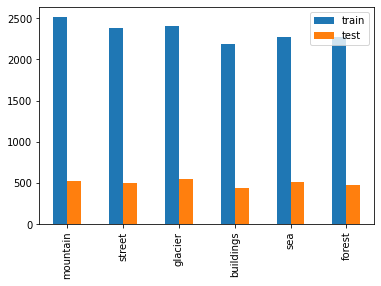

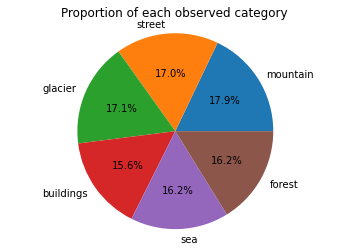

In [ ]:
# basic information about dataset from https://www.kaggle.com/code/vincee/intel-image-classification-cnn-keras

import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()